In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from dataset import Dataset
from utils import Utilities as utils
# for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Dataset Creation
Import data into a pandas dataframe using the created class Dataset

In [2]:
ds = Dataset()
files = os.listdir(ds.base_path+"/data/")
ds.createDataset(files)

/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")


Now we apply the cleanup pre-processing onto the dataframe, in which we also filter the columns we need

In [3]:
# Select only needed for the analysis 
ds.applyPreprocessing(columns=["Participants","Mobility Duration", "Sending Country Code", "Receiving Country Code",
                               "Special Needs", "Fewer Opportunities", "Participant Profile",
                               "Sending Organization", "Receiving Organization", "Receiving Organisation Erasmus Code",
                               "GroupLeader", "Sending Organisation Erasmus Code", "Education Level"])

# Remove all NaN values
ds.cleanDataframe()

Removed 11 columns
Removed 126 rows


Filter Data

In [4]:
# # Select only the eramus students researchers from Italy
# ds.applyFilter(column="Sending Country Code", value="IT")
# # Select only students currently under bachelor degree
# ds.applyFilter(column="Education Level", value="ISCED-7", criterion='contains')

The resulting dataframe becomes 

In [21]:
ds.df.where(ds.df['Receiving Country Code'] == 'IT')

,Mobility Duration,Education Level,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Sending Country Code,Sending Organization,Sending Organisation Erasmus Code,Receiving Country Code,Receiving Organization,Receiving Organisation Erasmus Code,Participants
23723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph creation
We can now go ahead and create our graph, again using the Dataset class 

In [6]:
from graph import CustomGraph as Graph

The graph are created started from the edges: the networkX library automatically creates the nodes from the edges.

In [7]:
import networkx as nx
import pandas as pd

edges = pd.DataFrame({"source" : ds.df["Sending Country Code"],
                      "target" : ds.df["Receiving Country Code"],
                      "weight" : ds.df["Participants"]
                         })
CountryGraph = nx.from_pandas_edgelist(edges, "source", "target", "weight", nx.DiGraph())


In [10]:
display(len(CountryGraph.nodes))
display(CountryGraph.edges)

94

OutEdgeView([('IT', 'BE'), ('IT', 'PT'), ('IT', 'FR'), ('IT', 'IE'), ('IT', 'SE'), ('IT', 'UK'), ('IT', 'AT'), ('IT', 'DE'), ('IT', 'ES'), ('IT', 'BG'), ('IT', 'HR'), ('IT', 'MT'), ('IT', 'EL'), ('IT', 'CZ'), ('IT', 'NO'), ('IT', 'NL'), ('IT', 'PL'), ('IT', 'LT'), ('IT', 'RO'), ('IT', 'IL'), ('IT', 'AM'), ('IT', 'AZ'), ('IT', 'UA'), ('IT', 'GE'), ('IT', 'ME'), ('IT', 'RS'), ('IT', 'PS'), ('IT', 'AL'), ('IT', 'RU'), ('IT', 'CA'), ('IT', 'TW'), ('IT', 'MA'), ('IT', 'BA'), ('IT', 'TN'), ('IT', 'XK'), ('IT', 'CN'), ('IT', 'AU'), ('IT', 'KH'), ('IT', 'UZ'), ('IT', 'LA'), ('IT', 'MN'), ('IT', 'ZA'), ('IT', 'IN'), ('IT', 'JO'), ('IT', 'EG'), ('IT', 'US'), ('IT', 'BR'), ('IT', 'PH'), ('IT', 'NZ'), ('IT', 'JP'), ('IT', 'EE'), ('IT', 'CY'), ('IT', 'SI'), ('IT', 'DK'), ('IT', 'FI'), ('IT', 'TR'), ('IT', 'HU'), ('IT', 'LV'), ('IT', 'SK'), ('IT', 'IS'), ('IT', 'LU'), ('IT', 'MK'), ('IT', 'LI'), ('IT', 'VN'), ('IT', 'CL'), ('IT', 'DZ'), ('IT', 'AR'), ('IT', 'ET'), ('IT', 'NP'), ('IT', 'UG'), ('IT', 

{('IT', 'BE'): Text(-0.3601911561909205, -0.3556982730494589, "{'weight': 1}"),
 ('IT', 'PT'): Text(0.32399909577894426, 0.31537438025156195, "{'weight': 1}"),
 ('IT',
  'FR'): Text(0.4568972640880925, -0.017265634109438224, "{'weight': 1}"),
 ('IT', 'IE'): Text(-0.3753477866033118, -0.2875374310159853, "{'weight': 1}"),
 ('IT', 'SE'): Text(-0.4528361227919707, 0.1583258053462422, "{'weight': 1}"),
 ('IT',
  'UK'): Text(-0.4527249263810705, -0.10328004909381072, "{'weight': 1}"),
 ('IT', 'AT'): Text(-0.42730459005958404, -0.254869611038694, "{'weight': 1}"),
 ('IT', 'DE'): Text(-0.321157343225183, -0.39764975113115403, "{'weight': 1}"),
 ('IT', 'ES'): Text(0.3320611002330697, -0.38237774586190737, "{'weight': 1}")}

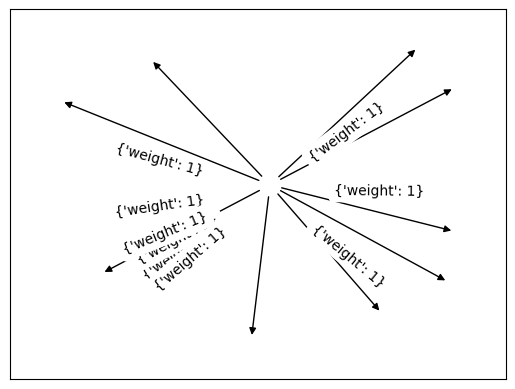

In [9]:
# Code to visualize ten nodes of the graph with their edges
nodes = list(CountryGraph.nodes())
first_10_nodes = nodes[:10]
G = nx.subgraph(CountryGraph, first_10_nodes)
nx.draw_networkx_edges(G,pos=nx.spring_layout(CountryGraph))
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(CountryGraph))

In [12]:
import networkx as nx
import pandas as pd
edges = pd.DataFrame({"source" : ds.df["Sending Organization"],
                      "target" : ds.df["Receiving Organization"],
                      "weight" : ds.df["Participants"]
                         })
UniNodes = nx.from_pandas_edgelist(edges, "source", "target", "weight", nx.DiGraph())

In [13]:
# example of the result with UNIVERSITA DI PADOVA
print("Sum of the exiting participants: ", sum(e[2]['weight'] for e in UniNodes.out_edges("UNIVERSITA DEGLI STUDI DI PADOVA", data=True)))
print("Total Neighbors:",UniNodes.degree(("UNIVERSITA DEGLI STUDI DI PADOVA")))
print("Out Degree:", UniNodes.out_degree("UNIVERSITA DEGLI STUDI DI PADOVA"))
print("In Degree:", UniNodes.in_degree("UNIVERSITA DEGLI STUDI DI PADOVA"))

Sum of the exiting participants:  1132
Total Neighbors: 1093
Out Degree: 1093
In Degree: 0


# PageRank
implementation from Networkx library

In [14]:
ranks = sorted(nx.pagerank(UniNodes, weight='weight').items(), key=lambda x: x[1], reverse=True)
UniNodes.pageranks = dict(ranks)

In [15]:
rank_df = pd.DataFrame(UniNodes.pageranks, index=['PageRank']).T
rank_df.index.name = 'University'
rank_df.columns = ['PageRank']
display(rank_df)

,PageRank
University,
ASOCIACIÓN CULTURAL INTEGRA,0.000560
LONDON PLACEMENT ACADEMY LIMITED,0.000532
Cap Ulysse,0.000505
Training Vision Ltd,0.000370
EUROYOUTH Portugal,0.000326
...,...
Beatrice Kruger,0.000065
JFB DESIGN MANAGEMENT,0.000065
MATTEO OLIVIERI,0.000065


In [16]:
ranks = sorted(nx.pagerank(CountryGraph, weight='weight').items(), key=lambda x: x[1], reverse=True)
CountryGraph.pageranks = dict(ranks)
print(CountryGraph.pageranks["IT"])

0.010542970367837547


In [17]:
rank_df = pd.DataFrame(CountryGraph.pageranks, index=['PageRank']).T
rank_df.index.name = 'Country'
rank_df.columns = ['PageRank']
display(rank_df)

,PageRank
Country,
HK,0.010826
BE,0.010637
PT,0.010637
FR,0.010637
IE,0.010637
...,...
BO,0.010637
CO,0.010637
GT,0.010637


# Clossness Centrality

In [18]:
_cc = nx.closeness_centrality(CountryGraph, distance='weight')
CountryGraph.centrality = dict(_cc)
display(CountryGraph.centrality)


{'IT': 0.0,
 'BE': 0.010752688172043012,
 'PT': 0.010752688172043012,
 'FR': 0.010752688172043012,
 'IE': 0.010752688172043012,
 'SE': 0.010752688172043012,
 'UK': 0.010752688172043012,
 'AT': 0.010752688172043012,
 'DE': 0.010752688172043012,
 'ES': 0.010752688172043012,
 'BG': 0.010752688172043012,
 'HR': 0.010752688172043012,
 'MT': 0.010752688172043012,
 'EL': 0.010752688172043012,
 'CZ': 0.010752688172043012,
 'NO': 0.010752688172043012,
 'NL': 0.010752688172043012,
 'PL': 0.010752688172043012,
 'LT': 0.010752688172043012,
 'RO': 0.010752688172043012,
 'IL': 0.010752688172043012,
 'AM': 0.010752688172043012,
 'AZ': 0.010752688172043012,
 'UA': 0.010752688172043012,
 'GE': 0.010752688172043012,
 'ME': 0.010752688172043012,
 'RS': 0.010752688172043012,
 'PS': 0.010752688172043012,
 'AL': 0.010752688172043012,
 'RU': 0.010752688172043012,
 'CA': 0.010752688172043012,
 'TW': 0.010752688172043012,
 'MA': 0.010752688172043012,
 'BA': 0.010752688172043012,
 'TN': 0.010752688172043012,
 '